In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['tensor-matrix', 'news-content-matrix', 'factor0']


In [2]:
filePath1='../input/factor0/factors0.npy'
factor=np.load(filePath1)

In [3]:
print(factor.shape)

(182, 3)


In [4]:
filePath2='../input/news-content-matrix/newsContent.csv'
newsContent=pd.read_csv(filePath2,encoding='utf-8',header=-1)

In [5]:
print(newsContent.shape)

(182, 1500)


In [6]:
#!pip install tensorly

In [7]:
#import tensorly

In [8]:
#T=tensorly.unfold(Tensor,0)
#from tensorly.decomposition import parafac
#factors = parafac(Tensor, rank=3)
#for f in factors:
#    print(f.shape)

In [9]:
#print(factors[0].shape)

In [10]:
X=np.concatenate((factor,newsContent),axis=1)

In [11]:
print(X.shape)

(182, 1503)


In [12]:
from keras.utils import np_utils

Using TensorFlow backend.


In [13]:
Y=np.zeros(182)
Y[91:182]=1

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0,shuffle=True)

In [15]:
Y_train = np_utils.to_categorical(Y_train,2)
Y_test = np_utils.to_categorical(Y_test,2)
print(Y_train.shape)
print(Y_test.shape)

(145, 2)
(37, 2)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
from keras.layers import LeakyReLU
import time

In [17]:
model = Sequential()

In [18]:
input_shape = (1503,)
model.add(Dense(128, activation = LeakyReLU(alpha=0.1),kernel_initializer='he_normal',input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1),kernel_initializer='he_normal'))
#model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation=LeakyReLU(alpha=0.1),kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax',kernel_initializer='he_normal'))

/opt/conda/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               192512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total para

In [20]:
model.compile(loss='binary_crossentropy', optimizer= 'Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,Y_train, batch_size=32, epochs=20,verbose=1,validation_data=(X_test,Y_test))

Train on 145 samples, validate on 37 samples
Epoch 1/20
145/145 [==============================] - 1s 4ms/step - loss: 0.8378 - acc: 0.4897 - val_loss: 0.6465 - val_acc: 0.5676
Epoch 2/20
145/145 [==============================] - 0s 183us/step - loss: 0.5564 - acc: 0.7379 - val_loss: 0.5534 - val_acc: 0.7027
Epoch 3/20
145/145 [==============================] - 0s 175us/step - loss: 0.4221 - acc: 0.8621 - val_loss: 0.5019 - val_acc: 0.7568
Epoch 4/20
145/145 [==============================] - 0s 170us/step - loss: 0.3515 - acc: 0.8897 - val_loss: 0.4455 - val_acc: 0.7838
Epoch 5/20
145/145 [==============================] - 0s 172us/step - loss: 0.2546 - acc: 0.9379 - val_loss: 0.4192 - val_acc: 0.8108
Epoch 6/20
145/145 [==============================] - 0s 171us/step - loss: 0.2296 - acc: 0.9586 - val_loss: 0.3920 - val_acc: 0.8649
Epoch 7/20
145/145 [==============================] - 0s 174us/step - loss: 0.1287 - acc: 0.9793 - val_loss: 0.3891 - val_acc: 0.8649
Epoch 8/20
145/145 

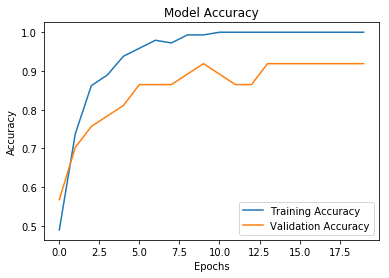

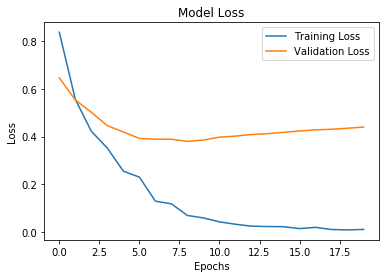

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'],loc='best')
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'],loc='best')

In [23]:
#from xgboost import XGBClassifier
#classifier = XGBClassifier()
#classifier.fit(X_train, Y_train)
#Y_pred = classifier.predict(X_test)

In [24]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
#print(cm)